#Exercise

Estimate the location from WIFI Signal Strength

The dataset has 2,000 rows and 8 columns.The data contains wifi signal strength observed from 7 wifi devices on a smartphone collected in an indoor space which could be used to estimate the location in one of the four rooms.

You can use ANN analysis for this exerise to improve the ANN performance.

In [96]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [97]:
# Import required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
# Import Sequential model for DNN
from keras.models import Sequential
# Dense for layer linear equation
from keras.layers import Dense


from keras import initializers 
from keras import regularizers 

In [98]:
path = '/drive/MyDrive/Colab Notebooks/wifi.csv'
df = pd.read_csv(path)

In [99]:
df.shape

(2000, 8)

In [100]:
df

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [101]:
df.columns

Index(['Wifi 1', 'Wifi 2', 'Wifi 3', 'Wifi 4', 'Wifi 5', 'Wifi 6', 'Wifi 7',
       'Room'],
      dtype='object')

In [102]:
X = df.drop('Room', axis = 1)
Y = pd.get_dummies(df['Room'])

In [103]:
Y.value_counts()

1  2  3  4
0  0  0  1    500
      1  0    500
   1  0  0    500
1  0  0  0    500
dtype: int64

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,
                                                    random_state = 0)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (1600, 7)
y_train shape (1600, 4)
X_test shape (400, 7)
y_test shape (400, 4)


In [105]:
# Normalization
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
# Building the sequential 

# number of neuron in hidden layer
L1 = 100
L2 = 100

model = Sequential()
# 1st hidden layer
model.add(Dense(L1,input_dim=7,activation='relu'))
# 2nd hidden layer, no need input_dim
model.add(Dense(L2,activation='relu'))

# output layer
# use softmax for categorical
model.add(Dense(4, activation='softmax'))

In [115]:
# Compiling the sequential 
# CategoricalCrossentropy for multiclass target var
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [116]:
# Training the model for 10 epochs(iteration)
# batch size = row of data, will be shuffle with diff row in each iteration
history = model.fit(X_train,y_train,epochs=100,batch_size=100,
                   validation_data=(X_test,y_test))

Epoch 1/100
16/16 [==============================] - 1s 17ms/step - loss: 1.0939 - accuracy: 0.6862 - val_loss: 0.8045 - val_accuracy: 0.8800
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5920 - accuracy: 0.8994 - val_loss: 0.4354 - val_accuracy: 0.9300
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3168 - accuracy: 0.9469 - val_loss: 0.2550 - val_accuracy: 0.9525
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1878 - accuracy: 0.9631 - val_loss: 0.1750 - val_accuracy: 0.9625
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1340 - accuracy: 0.9644 - val_loss: 0.1376 - val_accuracy: 0.9625
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1069 - accuracy: 0.9688 - val_loss: 0.1178 - val_accuracy: 0.9625
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0923 - accuracy: 0.9731 - val_loss: 0.1088 - val_accuracy: 0.9700
Epoch 8/100


In [117]:
# training acc
acc = history.history['accuracy']
# val acc
val_acc = history.history['val_accuracy']
# training loss
loss = history.history['loss']
# val loss
val_loss = history.history['val_loss']

In [118]:
# initializer & regularizer
# Building a linear stack of layers with the sequential model
L1 = 100
L2 = 100

model = Sequential()
model.add(Dense(L1,input_dim=7,activation='relu',
                kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(L2,activation='relu'))
#model.add(Dropout(rate=0.2))
model.add(Dense(4, activation='softmax'))

In [119]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')
history2=model.fit(X_train,y_train,epochs=100,
                  batch_size=100, validation_data=(X_test,y_test))

Epoch 1/100
16/16 [==============================] - 1s 18ms/step - loss: 2.8429 - accuracy: 0.7650 - val_loss: 2.3793 - val_accuracy: 0.9100
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 2.2371 - accuracy: 0.9463 - val_loss: 2.1572 - val_accuracy: 0.9400
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 2.0729 - accuracy: 0.9550 - val_loss: 2.0318 - val_accuracy: 0.9575
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 1.9635 - accuracy: 0.9644 - val_loss: 1.9363 - val_accuracy: 0.9525
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 1.8679 - accuracy: 0.9663 - val_loss: 1.8373 - val_accuracy: 0.9650
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 1.7809 - accuracy: 0.9706 - val_loss: 1.7549 - val_accuracy: 0.9700
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 1.6978 - accuracy: 0.9731 - val_loss: 1.6736 - val_accuracy: 0.9725
Epoch 8/100


In [120]:
# training acc
acc2 = history2.history['accuracy']
# val acc
val_acc2 = history2.history['val_accuracy']
# training loss
loss2 = history2.history['loss']
# val loss
val_loss2 = history2.history['val_loss']

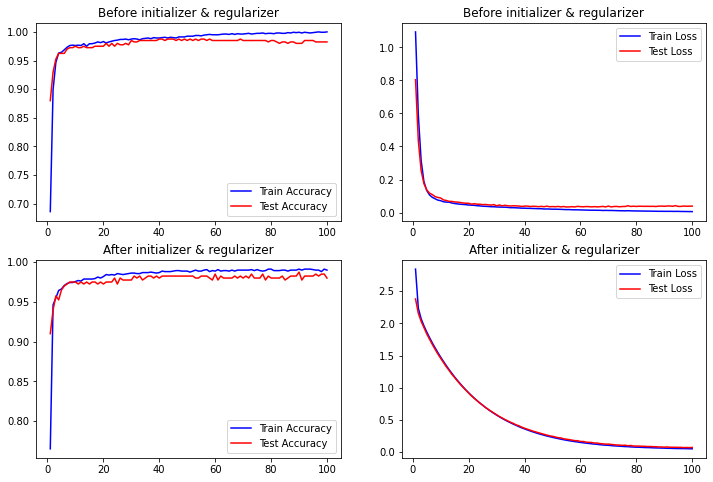

In [121]:
# create a figure with larger size
fig = plt.figure(figsize=(12, 8))


epochs = range(1,len(acc)+1)
# plot 1
plt.subplot(2, 2, 1)
plt.plot(epochs, acc,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.title("Before initializer & regularizer")
plt.legend()

# plot 2
plt.subplot(2, 2, 2)
plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.title("Before initializer & regularizer")
plt.legend()

epochs2 = range(1,len(acc2)+1)
# plot 3
plt.subplot(2, 2, 3)
plt.plot(epochs2, acc2,'b',label='Train Accuracy')
plt.plot(epochs2, val_acc2,'r',label='Test Accuracy')
plt.title("After initializer & regularizer")
plt.legend()

# plot 4
plt.subplot(2, 2, 4)
plt.plot(epochs2, loss2,'b',label='Train Loss')
plt.plot(epochs2, val_loss2,'r',label='Test Loss')
plt.title("After initializer & regularizer")
plt.legend()

# display the plots
plt.show()